In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(28, activation='relu')(encoded) # added
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=120,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6984 - val_loss: 0.6975
Epoch 2/50
500/500 [==============================] - 1s 3ms/step - loss: 0.6966 - val_loss: 0.6957
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6948 - val_loss: 0.6939
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6930 - val_loss: 0.6922
Epoch 5/50
500/500 [==============================] - 1s 3ms/step - loss: 0.6912 - val_loss: 0.6904
Epoch 6/50
500/500 [==============================] - 1s 3ms/step - loss: 0.6895 - val_loss: 0.6887
Epoch 7/50
500/500 [==============================] - 1s 3ms/step - loss: 0.6878 - val_loss: 0.6870
Epoch 8/50
500/500 [==============================] - 1s 3ms/step - loss: 0.6861 - val_loss: 0.6853
Epoch 9/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6844 - val_loss: 0.6837
Epoch 10/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6828 - val_loss: 0.6820

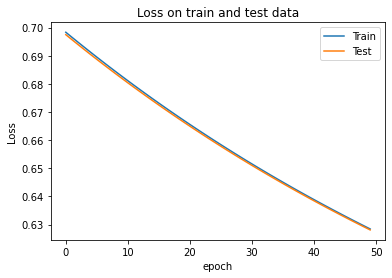

In [65]:
# plot the training history

plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Loss on train and test data")
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [72]:
# plot the test image
def validate_image(data):
    
    random_sample = np.random.choice(data.shape[0],1,replace = False)
    print(f"Tesing on image {random_sample[0]} \n")
    
    # plot a sample of test data
    plt.imshow(data[random_sample].reshape(28,28))
    plt.show()
    
    # plot the sample using reconstructed test data 
    
    pred = autoencoder.predict(data[random_sample].reshape(-1,784))
    plt.imshow(pred.reshape(28,28))
    plt.show()

Tesing on image 855 



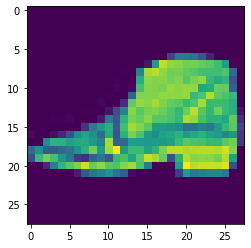

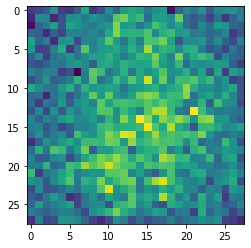

In [73]:
validate_image(x_test)